In [1]:
%matplotlib widget
import sys,os
sys.path.append('/home/christoph/pyptychostem/') # path to pyptychostem
import matplotlib.pyplot as plt
import multiprocessing
import typing
import numpy as np

from STEM4D import *
try:
    import pixstem.api as ps
except:
    print('cannot load pixstem package...')
    print('iCOM not possible')
    
try:
    import abtem 
except:
    print('cannot load abtem package...')
    print('ePIE not possible')



In [2]:
#path to  parameters file
parfile ='/home/christoph/pyptychostem/Examples/WS2_3MV/parameters.txt'




load data and using interactive plot

['file', 'WS2_3MV_rlx_final_dft_4D_60000V_ca20_nofp.npy']
['method', 'ssb']
['aperture', '0.02']
['stepsize', '0.15']
['voltage', '60.0']
['rotation', '0.0']
['']
['threshold', '0.3']
['workers', '8']
['CBED/BF', '-1']
['dose ', '1']
['']
['plot_4D', '0']
['plot_4D_reciprocal', '0']
['plot_aperture', '0']
['plot_result', '1']
['plot_trotters', '1']
['plot_power_spectrum', '0']
['']
['save', '1']
/home/christoph/pyptychostem/Examples/WS2_3MV/


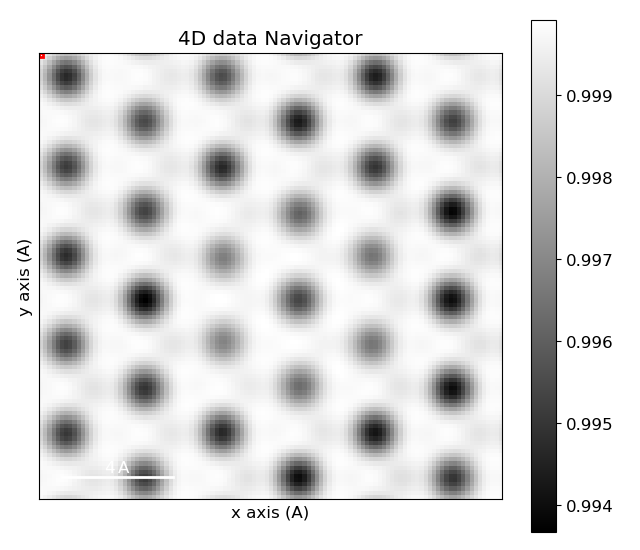

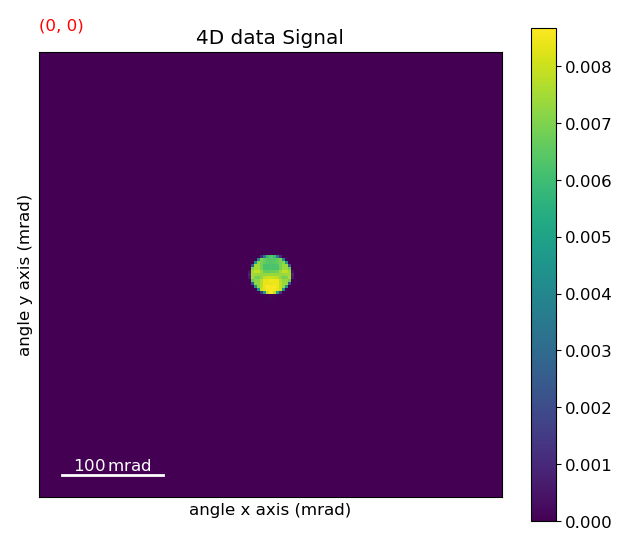

In [3]:
data_4D = Data4D(parfile)
#data_4D.center_ronchigrams()
data_4D.estimate_aperture_size()
s = data_4D.plot_4D()

In [4]:
data_4D.find_rotation()

0.0

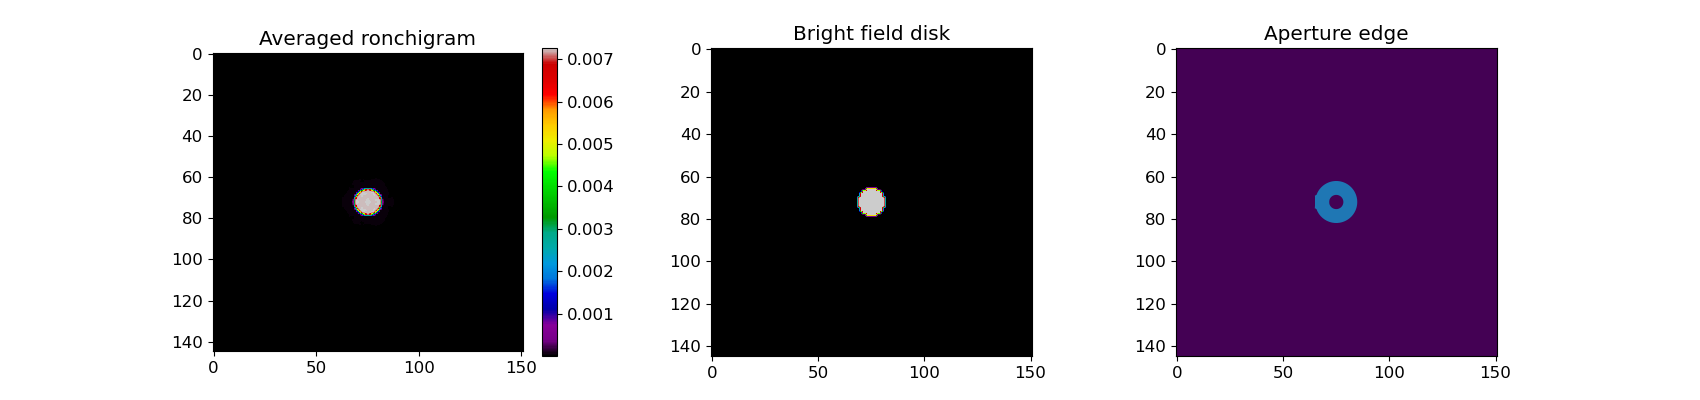

In [5]:
data_4D.plot_aperture()

The detector array can be cropped to the size of the BF disk

In [6]:
data_4D.truncate_ronchigram(expansion_ratio=1) # crops ronchigram to the BF disk



Compute Fourier Transform with respect to the probe position

<PixelatedSTEM, title: FT of 4D data, dimensions: (111, 107|13, 13)>

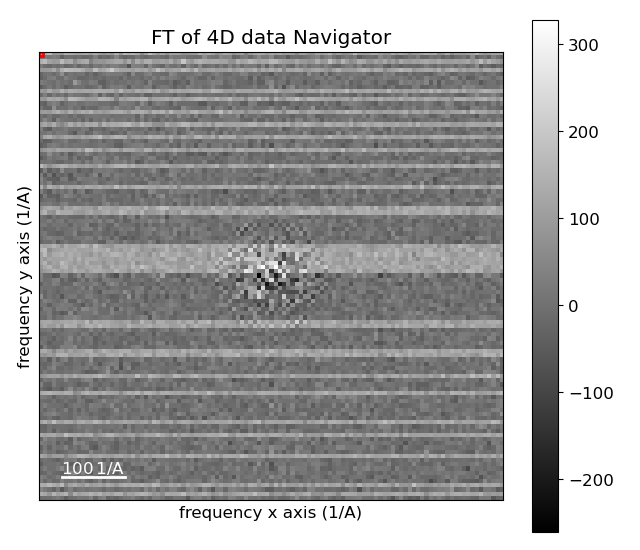

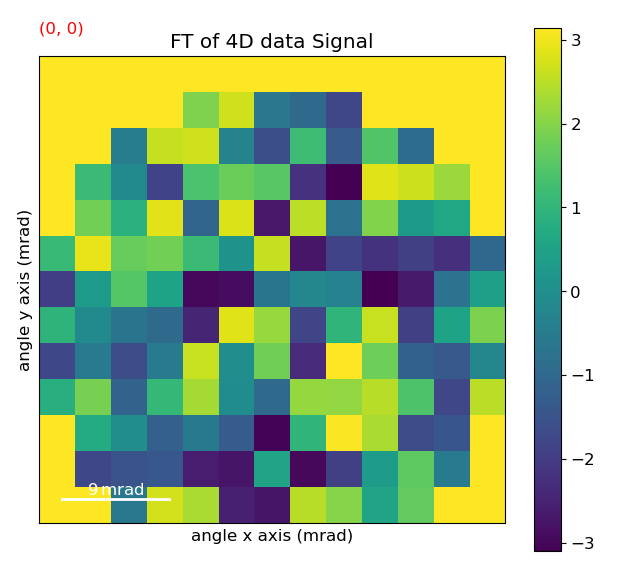

In [7]:
data_4D.apply_FT()
#data_4D.plot_4D_reciprocal(signal = 'amplitude') ## also can use signal = 'phase'
data_4D.plot_4D_reciprocal(signal='phase')


To pick the trotters with higherst intensities in the power spectrum, it is sometimes convenient to remove artifacts, e.g. vertical or horizontal stripes

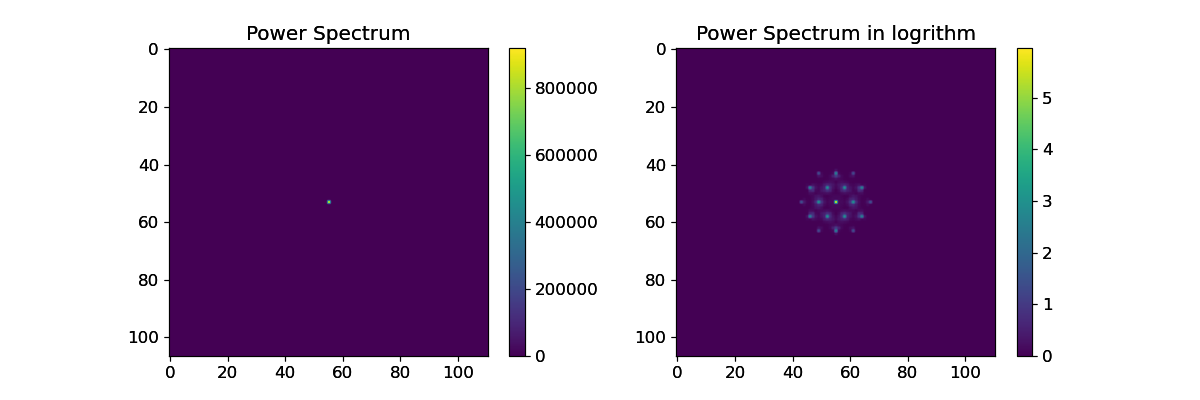

In [15]:
##use this to mask the power spectrum
#d = 7
#data_4D.power_spectra[:,int(data_4D.power_spectra.shape[1]/2)-int(d):int(data_4D.power_spectra.shape[1]/2)+int(d)] = 0
#data_4D.power_spectra[int(data_4D.power_spectra.shape[1]/2)-int(d):
#                     int(data_4D.power_spectra.shape[1]/2)+int(d),:] = 0
data_4D.plot_FT()

Now plot the 9 higherst intensity trotters. Optionally, the first N can be also skipped by using skip = N. We can also manually choose trotters by using selected frames = [[x1,y1],[x2,y2]]. Both, step size and rotation mismatch can be optimized.

In [16]:
## The step size can be changed here
rotation = 0
data_4D.plot_trotters(rotation,plot_constrains=True,skip=1)# value that fits


When the trotters are located, wwe can run the SSB algorithm. Although the atomic structure can still be identified, the phase values are incorrect due to aberrations of the probe which can lead to a wrong quantification.

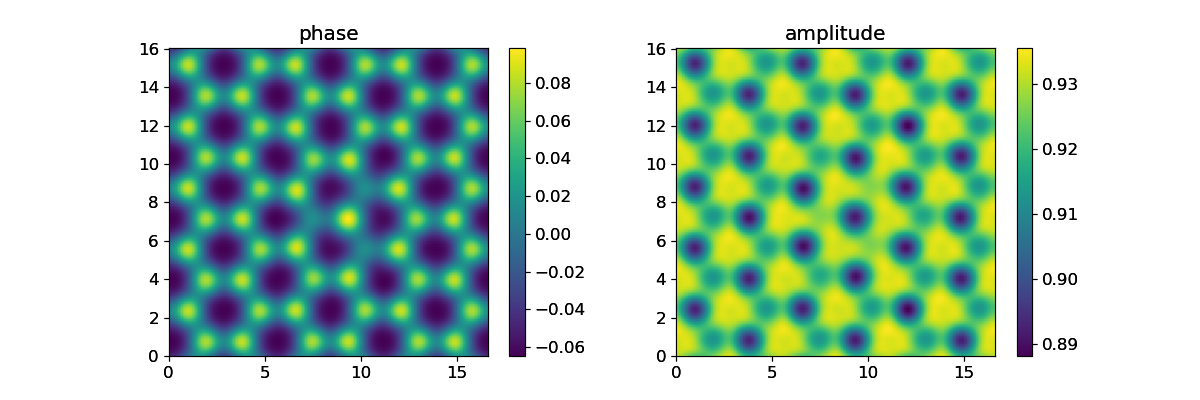

In [17]:
## use this to run SSB without aberration correction
ssb = SSB(data_4D)
ssb.run()
ssb.plot_result()

To perform aberration correction, we have to choose appropriate trotters. The programs uses the trotters chosen above, the number of trotters can be specified  (e.g. 5).